In [1]:
import warnings
warnings.filterwarnings('ignore') # warningが出ないように設定

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline


pd.set_option("display.max_rows", None) # pandasの表示上限をなくす
pd.set_option("display.max_columns", None) # pandasの表示上限をなくす

In [2]:
data_path = './data/'

train = pd.read_csv(data_path + 'train.csv')
test = pd.read_csv(data_path + 'test.csv')
pd.set_option("display.max_columns",1000)

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


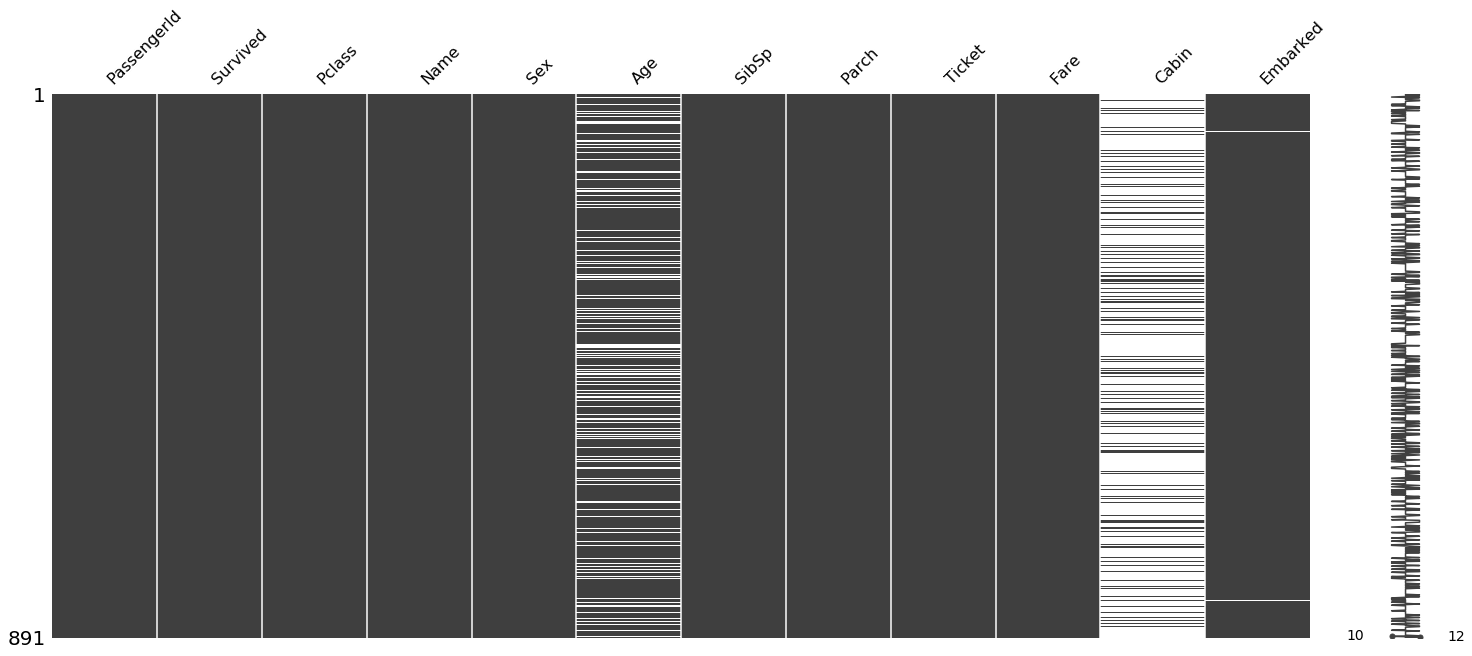

In [5]:
import missingno as msno

msno.matrix(train)

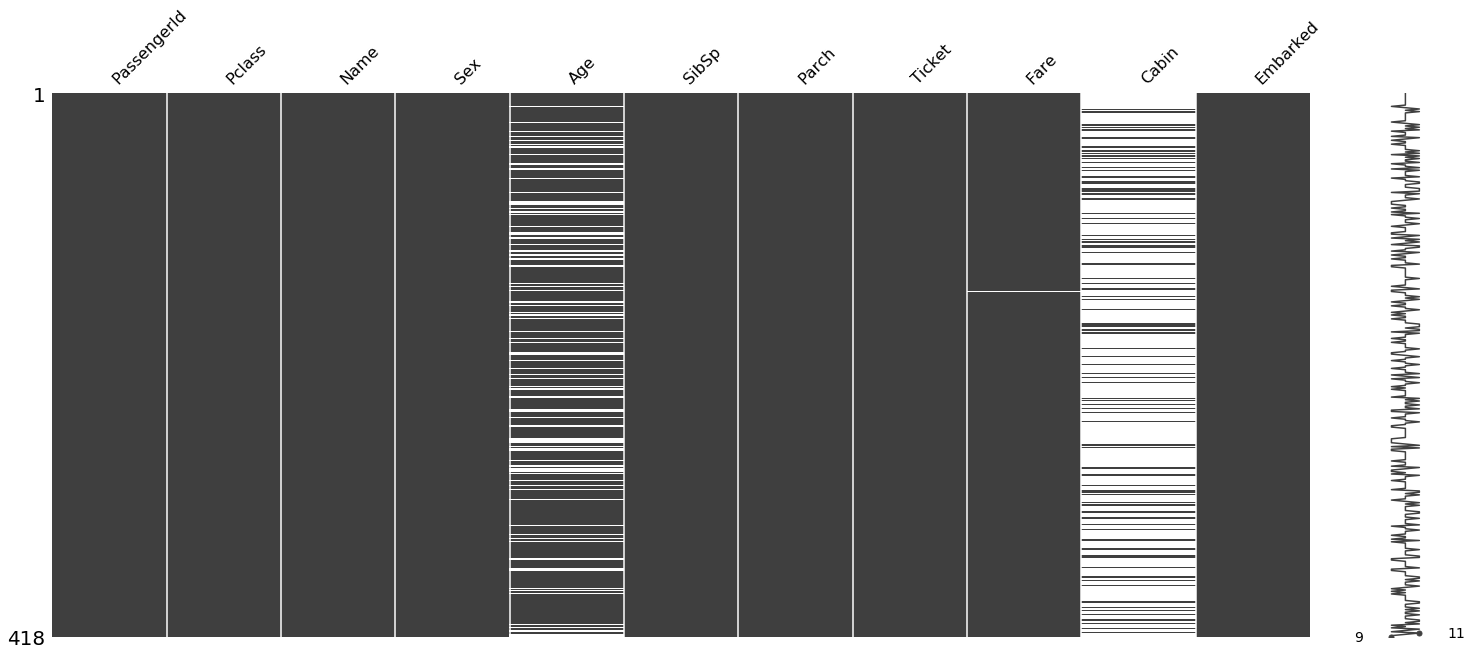

In [6]:
msno.matrix(test)

In [7]:
train = train.drop(columns=['Age', 'Cabin', 'Name', 'Ticket', 'Embarked'])
test = test.drop(columns=['Age', 'Cabin', 'Name', 'Ticket', 'Embarked'])

In [8]:
#カテゴリ変数の変換
train['Sex'] = train['Sex'].apply(lambda x: 1 if x == 'male' else 0)
test['Sex'] = test['Sex'].apply(lambda x: 1 if x == 'male' else 0)

In [9]:
## 欠損値の数と割合を返す
def missing_columns(df):
    total = df.isnull().sum().sort_values(ascending = False)
    percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)
    missing_data  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    return missing_data

In [10]:
missing_columns(train)

,Total,Percent
Fare,0,0.0
Parch,0,0.0
SibSp,0,0.0
Sex,0,0.0
Pclass,0,0.0
Survived,0,0.0
PassengerId,0,0.0


In [11]:
missing_columns(test)

,Total,Percent
Fare,1,0.239234
Parch,0,0.000000
SibSp,0,0.000000
Sex,0,0.000000
Pclass,0,0.000000
PassengerId,0,0.000000


In [12]:
#train = train.fillna(train.mean()) # 平均値代入
test = test.fillna(test.mean()) # 平均値代入

In [13]:
#missing_columns(train)

In [14]:
missing_columns(test)

,Total,Percent
Fare,0,0.0
Parch,0,0.0
SibSp,0,0.0
Sex,0,0.0
Pclass,0,0.0
PassengerId,0,0.0


In [15]:
train.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare
0,1,0,3,1,1,0,7.2500
1,2,1,1,0,1,0,71.2833
2,3,1,3,0,0,0,7.9250
3,4,1,1,0,1,0,53.1000
4,5,0,3,1,0,0,8.0500


In [16]:
#train data と test data をそれぞれ特徴量とラベルに分ける
from sklearn.model_selection import train_test_split
trainFeatures = train.drop(columns='Survived')
trainLabels = train.Survived

In [17]:
#Decision Tree learning
#from sklearn.tree import DecisionTreeClassifier
#treeModel = DecisionTreeClassifier(random_state=0)
#treeModel = treeModel.fit(train_features, train_labels)
#treePred = treeModel.predict(test)

In [18]:
#random forest
from sklearn.ensemble import RandomForestClassifier
randomFModel = RandomForestClassifier(random_state=0)
randomFModel = randomFModel.fit(trainFeatures, trainLabels)
randomFPred = randomFModel.predict(test)

In [19]:
test.head()

,PassengerId,Pclass,Sex,SibSp,Parch,Fare
0,892,3,1,0,0,7.8292
1,893,3,0,1,0,7.0000
2,894,2,1,0,0,9.6875
3,895,3,1,0,0,8.6625
4,896,3,0,1,1,12.2875


In [20]:
print(randomFPred)
print(len(randomFPred))
print(test)
print(len(test))

[0 0 0 0 0 0 1 0 1 0 0 1 1 0 1 1 0 0 0 1 0 1 1 0 1 0 1 0 1 0 0 0 0 0 0 0 0
 0 0 0 1 1 0 1 1 0 1 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 1 0 0 0 1
 1 0 0 1 0 0 1 0 1 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 1 1 1 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0
 1 0 1 0 0 0 0 0 1 0 1 0 1 1 1 1 0 0 0 0 1 0 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 1 0
 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 1
 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 1 1 0
 0 0 1 0 1 0 0 0 0 0 1 1 1 0 1 0 1 1 0 0 0 0 1 1 0 0 0 0 1 1 0 1 0 0 0 1 0
 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 1 0 0 1 0 0 1 0 0 0]
418
     PassengerId  Pclass  Sex  SibSp  Parch        Fare
0            892       3    1      0      0    7.829200
1            893       3    0      

In [21]:
# テスト値を再読み込みして，randomForestでクラス分類したカラムを追加
df_out = pd.read_csv("./data/test.csv")
randomFPred = pd.Series(randomFPred)
df_out["Survived"] = randomFPred

# outputディレクトリに出力する
df_out[["PassengerId","Survived"]].to_csv("./data/randomFSubmission.csv",index=False)

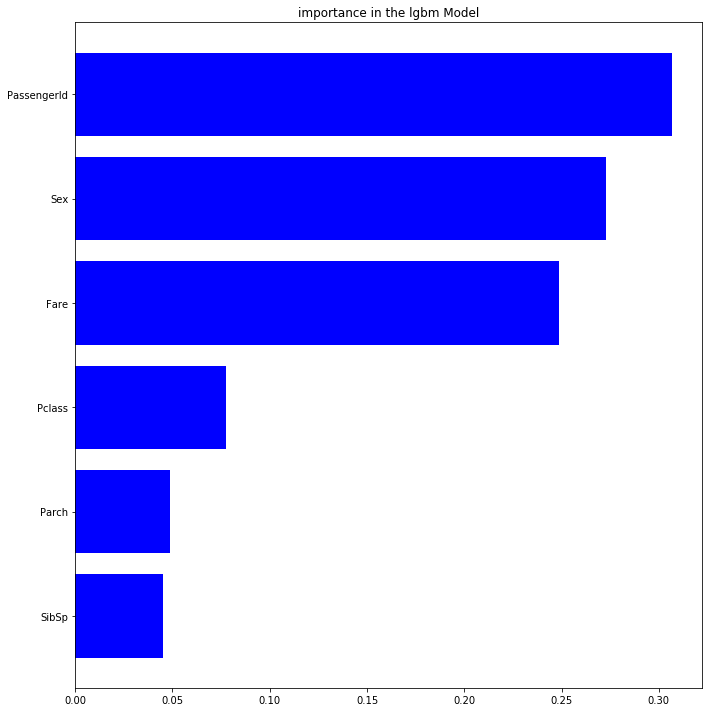

In [22]:
# feature importanceを可視化
plt.figure(figsize=(10,10))
features = trainFeatures.columns
importances = randomFModel.feature_importances_
indices = np.argsort(importances)
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.title("importance in the lgbm Model")
plt.tight_layout(h_pad=7)
plt.show()

In [23]:
#light gbm 用データ分割
X_train, X_test, y_train, y_test = train_test_split(trainFeatures, trainLabels, test_size=0.2, random_state=72)

In [28]:
#モデル用データセット生成
import lightgbm as lgb
lgbTrain = lgb.Dataset(X_train, y_train)
lgbTest = lgb.Dataset(X_test, y_test)
lgbFinalTrain = lgb.Dataset(trainFeatures, trainLabels)

In [32]:
#light gbm

lgbParams = {
    'boosting': 'dart',          # dart (drop out trees) often performs better
    'application': 'binary',     # Binary classification
    'learning_rate': 0.05,       # Learning rate, controls size of a gradient descent step
    'min_data_in_leaf': 20,      # Data set is quite small so reduce this a bit
    'feature_fraction': 0.7,     # Proportion of features in each boost, controls overfitting
    'num_leaves': 41,            # Controls size of tree since LGBM uses leaf wise splits
    'metric': 'binary_logloss',  # Area under ROC curve as the evaulation metric
    'drop_rate': 0.15
}

#学習
evaluationResults = {}
lgbModel = lgb.train(train_set=lgbTrain,
                     params=lgbParams,
                     valid_sets=[lgbTrain, lgbTest], 
                     valid_names=['Train', 'Test'],
                     evals_result=evaluationResults,
                     num_boost_round=500,
                     early_stopping_rounds=100,
                     verbose_eval=20
                    )

optimum_boost_rounds = lgbModel.best_iteration

Training until validation scores don't improve for 100 rounds.
[20]	Train's binary_logloss: 0.479985	Test's binary_logloss: 0.511406
[40]	Train's binary_logloss: 0.423776	Test's binary_logloss: 0.471462
[60]	Train's binary_logloss: 0.416813	Test's binary_logloss: 0.47352
[80]	Train's binary_logloss: 0.398441	Test's binary_logloss: 0.461717
[100]	Train's binary_logloss: 0.391624	Test's binary_logloss: 0.461982
[120]	Train's binary_logloss: 0.38262	Test's binary_logloss: 0.453705
[140]	Train's binary_logloss: 0.367974	Test's binary_logloss: 0.446456
[160]	Train's binary_logloss: 0.372195	Test's binary_logloss: 0.450061
[180]	Train's binary_logloss: 0.346669	Test's binary_logloss: 0.443781
[200]	Train's binary_logloss: 0.332183	Test's binary_logloss: 0.441315
[220]	Train's binary_logloss: 0.325152	Test's binary_logloss: 0.443974
[240]	Train's binary_logloss: 0.31114	Test's binary_logloss: 0.443411
[260]	Train's binary_logloss: 0.303713	Test's binary_logloss: 0.443684
[280]	Train's binary_

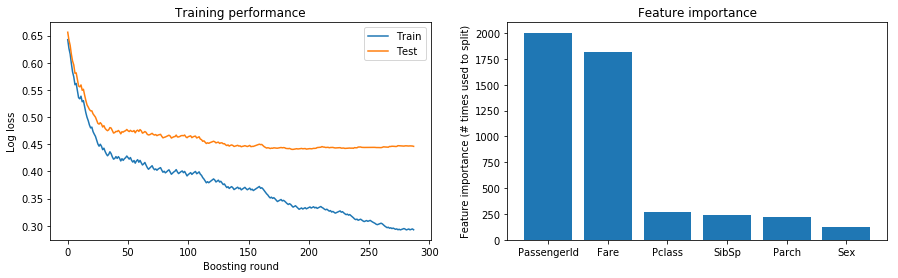

In [34]:
fig, axs = plt.subplots(1, 2, figsize=[15, 4])

# Plot the log loss during training
axs[0].plot(evaluationResults['Train']['binary_logloss'], label='Train')
axs[0].plot(evaluationResults['Test']['binary_logloss'], label='Test')
axs[0].set_ylabel('Log loss')
axs[0].set_xlabel('Boosting round')
axs[0].set_title('Training performance')
axs[0].legend()

# Plot feature importance
importances = pd.DataFrame({'features': lgbModel.feature_name(), 
                            'importance': lgbModel.feature_importance()}).sort_values('importance', ascending=False)
axs[1].bar(x=np.arange(len(importances)), height=importances['importance'])
axs[1].set_xticks(np.arange(len(importances)))
axs[1].set_xticklabels(importances['features'])
axs[1].set_ylabel('Feature importance (# times used to split)')
axs[1].set_title('Feature importance')

plt.show()



In [36]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
preds = np.round(lgbModel.predict(X_test))
print('Accuracy score = \t {}'.format(accuracy_score(y_test, preds)))
print('Precision score = \t {}'.format(precision_score(y_test, preds)))
print('Recall score =   \t {}'.format(recall_score(y_test, preds)))
print('F1 score =      \t {}'.format(f1_score(y_test, preds)))

Accuracy score = 	 0.7932960893854749
Precision score = 	 0.7611940298507462
Recall score =   	 0.7083333333333334
F1 score =      	 0.7338129496402879


In [37]:
lgbFinal = lgb.train(train_set=lgbFinalTrain,
                      params=lgbParams,
                      num_boost_round=optimum_boost_rounds,
                      verbose_eval=0
                      )

lgbPred = np.round(lgbFinal.predict(test)).astype(int)

In [38]:
print(lgbPred)

[0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 0 1 1 0 1 1 1 0 1 0 1 0 0 0 0 0 1 0 0
 0 0 0 0 1 0 1 1 0 1 0 1 1 1 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 0 0 1 1 0 0 0 1
 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0
 1 1 1 0 0 1 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 0 0 0 0 0 0 1 1 1 1 1 0 1 1 0 1
 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 1 0
 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 1 1 1 0 0 0 1 0 1 0 1 0 1 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 1 0 0
 1 0 0 0 0 0 1 0 0 1 1 0 1 0 0 0 0 0 1 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 1 1 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 1 0 0 1 0 0 0 0 1 1 0 1 0 0 0 1 0
 0 1 0 0 1 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 1 0 0 0 1 0 1 0 0 1 0 1 0 1 0 0
 1 1 1 0 1 0 0 1 0 0 0]


In [39]:
# テスト値を再読み込みして，randomForestでクラス分類したカラムを追加
df_out = pd.read_csv("./data/test.csv")
lgbPred = pd.Series(lgbPred)
df_out["Survived"] = lgbPred

# outputディレクトリに出力する
df_out[["PassengerId","Survived"]].to_csv("./data/lgbSubmission.csv",index=False)

In [ ]:
#結果が低いので特徴量を選びなおして再度lightGBM

In [40]:
train.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare
0,1,0,3,1,1,0,7.2500
1,2,1,1,0,1,0,71.2833
2,3,1,3,0,0,0,7.9250
3,4,1,1,0,1,0,53.1000
4,5,0,3,1,0,0,8.0500


In [ ]:
train = train.drop(columns=['Age'])